In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_excel('/content/TheOffice.xlsx')
df.shape

(55130, 12)

In [ ]:
df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction,imdb_rating,total_votes,air_date
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...,7.6,3706,2005-03-24
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So...",7.6,3706,2005-03-24
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...,7.6,3706,2005-03-24
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah.",7.6,3706,2005-03-24
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done.",7.6,3706,2005-03-24


In [ ]:
len(df['character'].unique())

773

In [17]:
from collections import Counter

In [ ]:
Counter(df['character']).most_common(20)

[('Michael', 10921),
 ('Dwight', 6847),
 ('Jim', 6303),
 ('Pam', 5031),
 ('Andy', 3754),
 ('Angela', 1569),
 ('Kevin', 1564),
 ('Erin', 1440),
 ('Oscar', 1368),
 ('Ryan', 1198),
 ('Darryl', 1182),
 ('Phyllis', 970),
 ('Kelly', 841),
 ('Toby', 818),
 ('Jan', 810),
 ('Stanley', 678),
 ('Meredith', 559),
 ('Holly', 555),
 ('Nellie', 529),
 ('Gabe', 427)]

In [ ]:
Counter(df['character']).most_common()[:-10-1:-1]

[('Carol Stills', 1),
 ('Casey Dean', 1),
 ('Woman 3', 1),
 ('Man 3', 1),
 ('Woman 1', 1),
 ('Man 1', 1),
 ('People in line', 1),
 ('Camera Crew', 1),
 ('Philip', 1),
 ('Production Assistant', 1)]

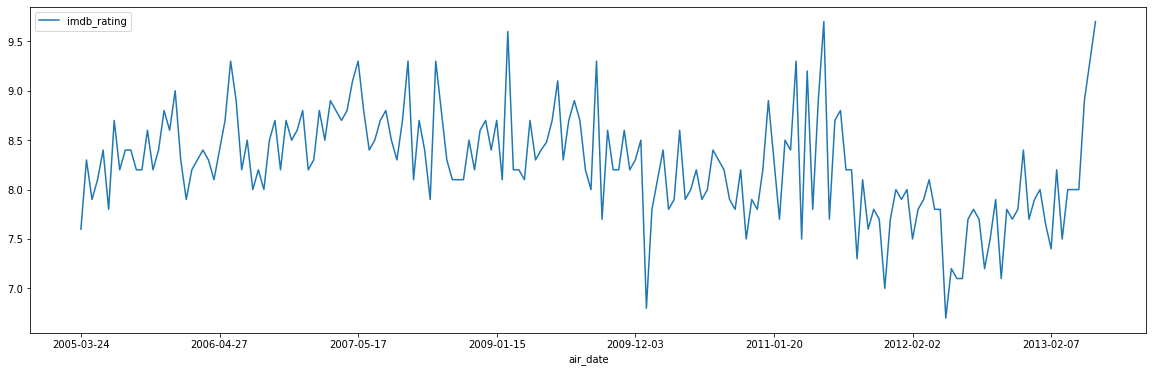

In [ ]:
df[['air_date','imdb_rating']].groupby(['air_date']).mean().plot(figsize=(20,6))
plt.show()

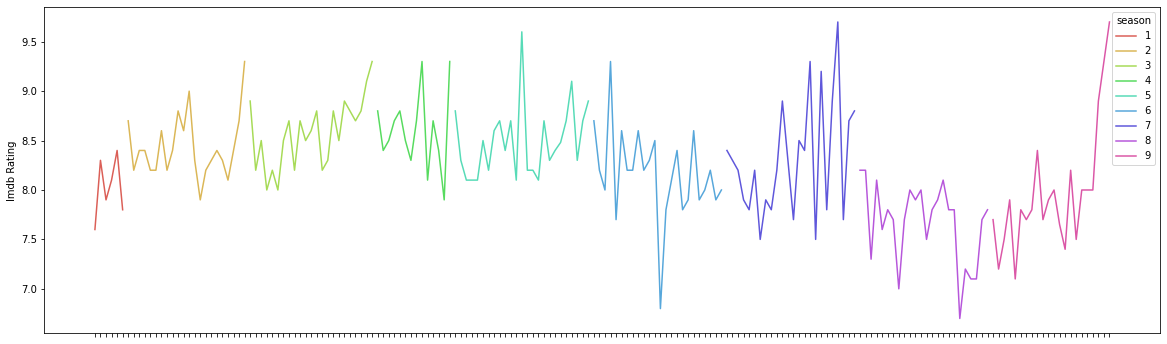

In [ ]:
g_dates = df[['air_date','imdb_rating', 'season']].groupby(['air_date', 'season']).mean()
palette = sns.color_palette("hls", 9)
plt.figure(figsize=(20,6))
fig = sns.lineplot(data=g_dates, x="air_date", y="imdb_rating", hue="season",palette=palette)
fig.set(xticklabels=[])
plt.xlabel("")
plt.ylabel('Imdb Rating')
plt.show()

In [ ]:
episodes = []
for date in df['air_date'].unique():
  temp1 = df[df['air_date'] == date]
  temp_character = np.sort(temp1['character'].unique())
  temp_dict = {}
  for character in temp_character:
    temp_dict[character] = len(temp1[temp1['character']== character])/len(temp1['character'])
    temp_df = pd.DataFrame.from_dict(temp_dict, orient='index', columns=[date])
  episodes.append(temp_df)

In [ ]:
df_perc = pd.DataFrame()
for i in episodes:
  df_perc = pd.concat([i, df_perc], axis=1)

In [ ]:
df_perc.shape

(773, 184)

In [ ]:
df_perc.fillna(0, inplace=True)

In [ ]:
rating_dict = {}
for date in df['air_date'].unique():
  temp1 = df[df['air_date'] == date]
  rating = temp1['imdb_rating'].iloc[1]
  rating_dict[date] = rating

In [ ]:
len(rating_dict)

184

In [ ]:
df_perc = df_perc.T

In [ ]:
ratings = pd.DataFrame.from_dict(rating_dict, orient='index',columns=['rating'])

In [ ]:
df_perc.shape, ratings.shape

((184, 773), (184, 1))

In [ ]:
perc_rate = pd.concat([df_perc, ratings], axis=1)

In [ ]:
perc_rate.shape

(184, 774)

In [ ]:
mike = perc_rate[perc_rate['Michael'] > 0]
mike.shape

(136, 774)

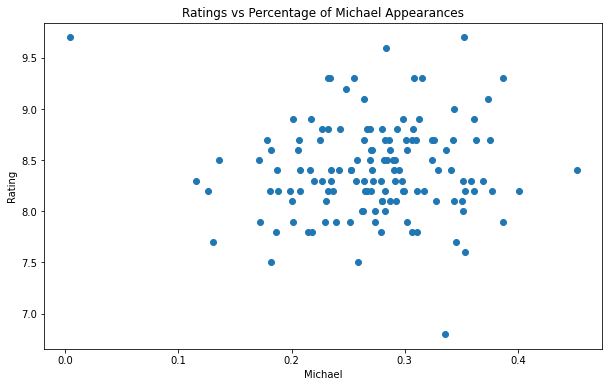

In [ ]:
x = mike['Michael']
y = mike['rating']

plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.title('Ratings vs Percentage of Michael Appearances')
plt.xlabel('Michael')
plt.ylabel('Rating')
plt.show()

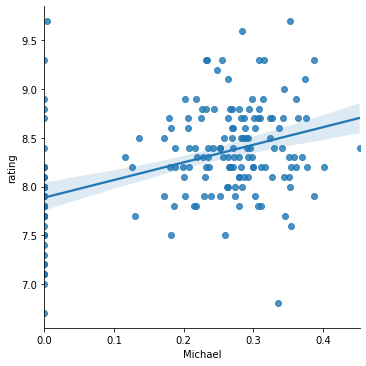

In [ ]:
sns.lmplot(x='Michael',y='rating',data=perc_rate)
plt.show()

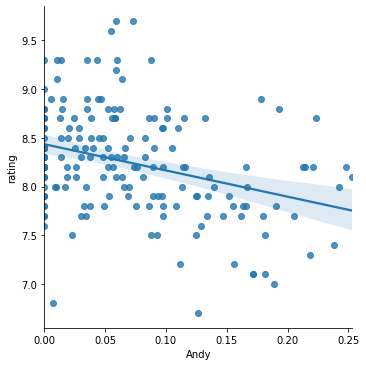

In [ ]:
sns.lmplot(x='Andy',y='rating',data=perc_rate)
plt.show()

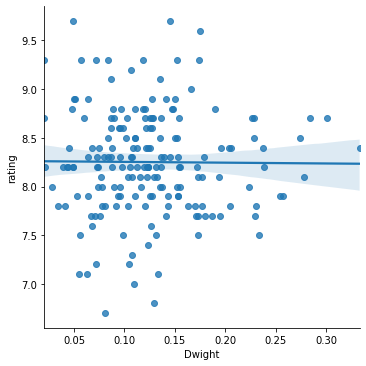

In [ ]:
sns.lmplot(x='Dwight',y='rating',data=perc_rate)
plt.show()

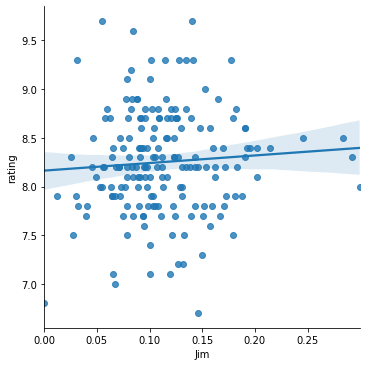

In [ ]:
sns.lmplot(x='Jim',y='rating',data=perc_rate)
plt.show()

In [ ]:
top_20 = Counter(df['character']).most_common(20)

In [ ]:
top_20 = pd.DataFrame(top_20)[0]

In [ ]:
top20_df = perc_rate[perc_rate.columns.intersection(top_20)]
top20_df.shape

(184, 20)

In [ ]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(top20_df['Michael'], perc_rate['rating'])
print('Michael Pearsons correlation: %.3f' % corr)
print('P-Value: %.3f' % p_value)

Michael Pearsons correlation: 0.448
P-Value: 0.000


In [ ]:
corr, p_value = pearsonr(top20_df['Andy'], perc_rate['rating'])
print('Andy Pearsons correlation: %.3f' % corr)
print('P-Value: %.3f' % p_value)

Andy Pearsons correlation: -0.332
P-Value: 0.000


In [ ]:
corr, p_value = pearsonr(top20_df['Erin'], perc_rate['rating'])
print('Erin Pearsons correlation: %.3f' % corr)
print('P-Value: %.3f' % p_value)

Erin Pearsons correlation: -0.396
P-Value: 0.000


In [ ]:
y = perc_rate['rating']
X = top20_df

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     4.402
Date:                Sun, 29 Nov 2020   Prob (F-statistic):           3.85e-08
Time:                        23:46:33   Log-Likelihood:                -105.73
No. Observations:                 184   AIC:                             253.5
Df Residuals:                     163   BIC:                             321.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6493      0.369     20.724      0.0

In [154]:
writers_list = []
for date in df['air_date'].unique():
  temp1 = df[df['air_date']== date]
  writers_list.append(temp1['writer'].iloc[0])

In [182]:
top10_writers = pd.DataFrame(Counter(writers_list).most_common(10))

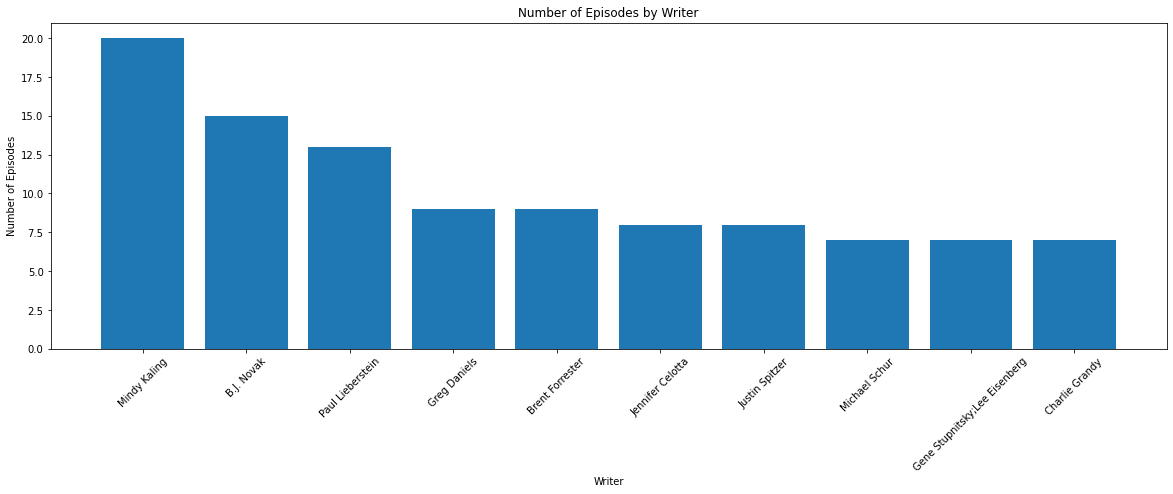

In [183]:
plt.figure(figsize=(20,6))
plot = plt.bar(top10_writers[0],top10_writers[1])
plt.xlabel("Writer")
plt.ylabel("Number of Episodes")
plt.title("Number of Episodes by Writer")
plt.xticks(rotation=45)
plt.show()

In [169]:
top10_writers = top10_writers[0]

In [170]:
ratings = {}
for writer in top10_writers:
  temp1 = df[df['writer'] == writer]
  ratings[writer] = temp1['imdb_rating'].mean()

In [172]:
writers_ordered = pd.DataFrame.from_dict(ratings,orient='index', columns=['rating']).sort_values(by='rating',ascending=False)

In [174]:
writers_ordered

,rating
Greg Daniels,8.877823
Gene Stupnitsky;Lee Eisenberg,8.525758
Michael Schur,8.503178
Paul Lieberstein,8.491776
Brent Forrester,8.398524
Mindy Kaling,8.371536
Jennifer Celotta,8.366028
B.J. Novak,8.358683
Justin Spitzer,8.182528
Charlie Grandy,7.919837


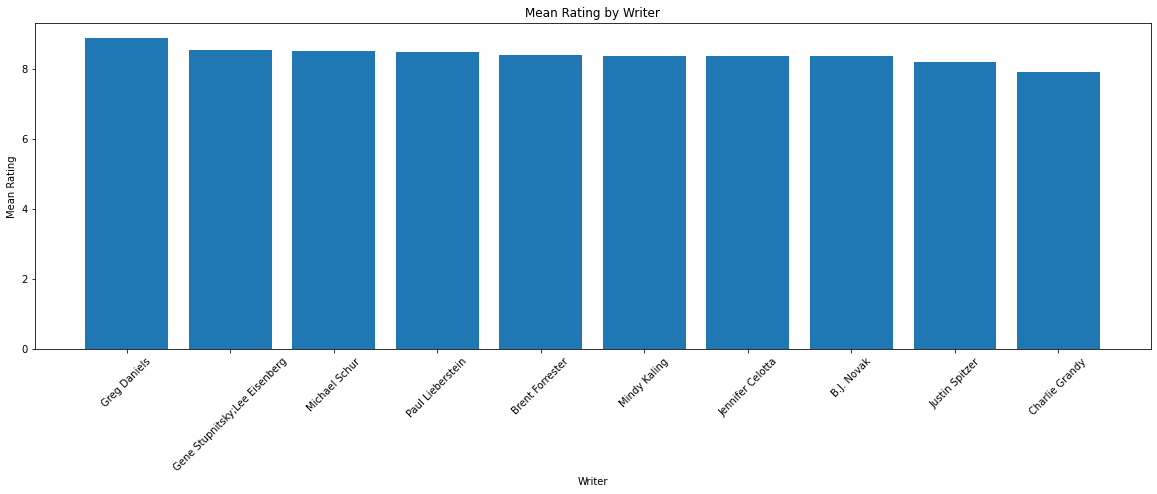

In [180]:
plt.figure(figsize=(20,6))
plt.bar(writers_ordered.index,writers_ordered['rating'])
plt.xlabel("Writer")
plt.ylabel("Mean Rating")
plt.title("Mean Rating by Writer")
plt.xticks(rotation=45)
plt.show()

In [91]:
directors_list = []
for date in df['air_date'].unique():
  temp1 = df[df['air_date'] == date]
  directors_list.append(temp1['director'].iloc[0])

In [143]:
top10_directors = pd.DataFrame(Counter(directors_list).most_common(10))

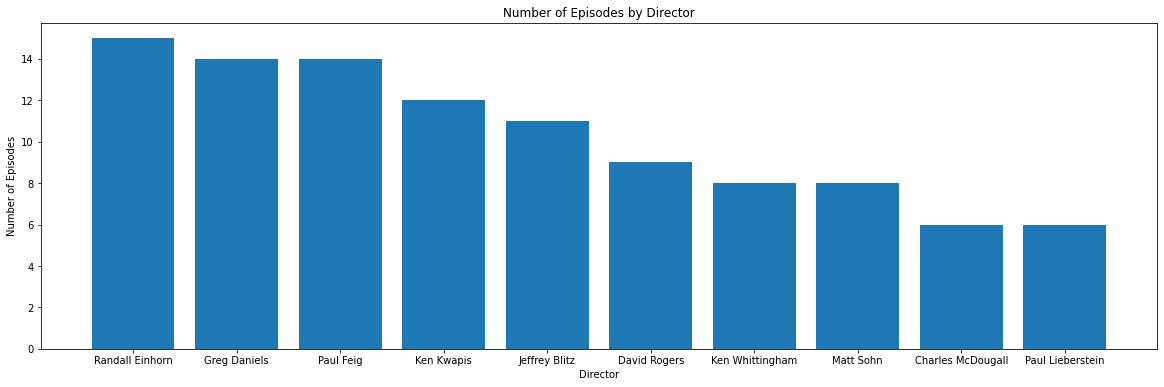

In [147]:
plt.figure(figsize=(20,6))
plt.bar(top10_directors[0],top10_directors[1])
plt.xlabel("Director")
plt.ylabel("Number of Episodes")
plt.title("Number of Episodes by Director")
plt.show()

In [109]:
top10_directors = top10_directors[0]

In [116]:
ratings = {}
for director in top10_directors:
  temp1 = df[df['director'] == director]
  ratings[director] = temp1['imdb_rating'].mean()

In [127]:
directors_ordered = pd.DataFrame.from_dict(ratings,orient='index', columns=['rating']).sort_values(by='rating',ascending=False)

In [148]:
directors_ordered

,rating
Paul Feig,8.774183
Ken Kwapis,8.682215
Greg Daniels,8.565014
Jeffrey Blitz,8.517116
Ken Whittingham,8.412711
Charles McDougall,8.300936
Randall Einhorn,8.154541
Paul Lieberstein,8.091764
David Rogers,8.078406
Matt Sohn,7.868485


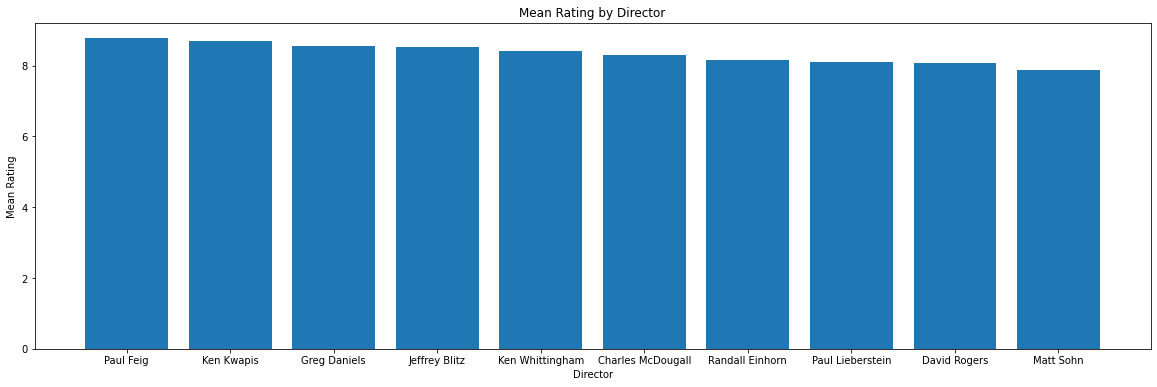

In [139]:
plt.figure(figsize=(20,6))
plt.bar(directors_ordered.index,directors_ordered['rating'])
plt.xlabel("Director")
plt.ylabel("Mean Rating")
plt.title("Mean Rating by Director")
plt.show()